# Import required Library

In [111]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


# Read Data and Visualize

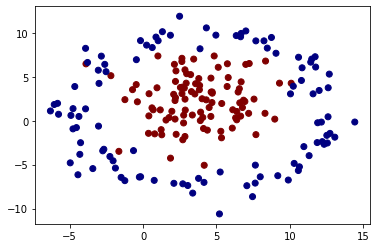

In [112]:
df = pd.read_csv('synthetic-4.csv', header = None)
df1 = pd.read_csv('synthetic-4.csv', header = None)
plt.scatter(df[0], df[1], c = df[2],cmap=plt.get_cmap('jet'))



# Node of Tree

In [113]:
class Node():
    feature = "no split"
    leaf = False
    prediction = -9999
    child1 = None
    child2 = None
    child3 = None
    child4 = None


# Function to discretize Data (4 bins used)

In [114]:
def discretize_data(df):
    bins = 4
    for col, data in df.iteritems():
        if col != "class" and col != 2:
            minimum = data.min()
            maximum = data.max()
            width = (maximum - minimum)/ (bins)
            bin1 = data.min() + width
            bin2 = bin1 + width
            bin3 = bin2 + width
            bin4 = bin3 + width
            print(col, "//",minimum, bin1, bin2, bin3, bin4)
            for i, value in enumerate(data):
                if(value >= minimum and value <= bin1):
                    data.at[i] = 1
                elif(value > bin1 and value <=bin2):
                    data.at[i] = 2
                elif(value > bin2 and value <=bin3):
                    data.at[i] = 3
                elif(value > bin3 and value <=bin4):
                    data.at[i] = 4
                else:
                    print("NaN")
    return df

# Entropy Calculation

In [115]:
# target is class label and df is the dataset
def entropy(df, target):
    entropy_value = 0.0
    positive_case = df[df[target] == 1]
    negative_case = df[df[target] == 0]
    p = float(positive_case.shape[0])
    n = float(negative_case.shape[0])
    if(p == 0 or n == 0):
        entropy_value = 0
    else:
        entropy_value = ((-1*p)/(p + n))*math.log(p/(p+n), 2) + ((-1*n)/(p + n))*math.log(n/(p+n), 2)
    return entropy_value 


In [116]:
def subset_entropy(df, subset_df, target):
#     Calculate the second part of gain formula using entropy and division
    num_data = df.shape[0]
    ans = float(0)
    for bin in subset_df:
        ans += float(bin.shape[0]/num_data)*entropy(bin, target)
    return ans


# Gain Calculation

In [117]:
def gain(df, attribute, target):
#    We have 4 bins so subdivide the data and use gain formula
    bin1 = df[df[attribute] == 1]
    bin2 = df[df[attribute] == 2] 
    bin3 = df[df[attribute] == 3] 
    bin4 = df[df[attribute] == 4] 
    gain = entropy(df, target) - subset_entropy(df, [bin1, bin2, bin3, bin4], target)
    return gain


# Choose Split Feature

In [118]:
def choose_feature_split(df, attribute, target):
    max_gain = float("-inf")
    best_feature = None
#     print(attribute)
    for feature in attribute:
#         if(np.int64(target).item() != feature):
        
        g = gain(df, feature, target)
        if(max_gain < g):
            max_gain = g
            best_feature = feature
    return max_gain, best_feature

# ID3 Algorithm to construct tree

In [119]:
def ID3(df, attribute, target, depth):
    node = Node()
    positive_example = df[df[target] == 1]
    negative_example = df[df[target] == 0]
    positive_number = positive_example.shape[0]
    negative_number = negative_example.shape[0]
    if(positive_number == 0 or negative_number == 0 or len(attribute) == 0 or depth == 3):#depth
        node.leaf = True
        if(positive_number > negative_number):
            node.prediction = 1
        else:
            node.prediction = 0
        return node        
    else:
        max_gain, best_feature = choose_feature_split(df, attribute, target)
        node.feature = best_feature
        
        bin1 = df[df[best_feature] == 1]
        bin2 = df[df[best_feature] == 2] 
        bin3 = df[df[best_feature] == 3] 
        bin4 = df[df[best_feature] == 4] 
        
        attribute_cpy1 = attribute.copy()
        attribute_cpy1.remove(best_feature)
        node.child1 = ID3(bin1, attribute_cpy1, target, depth + 1)
        
        attribute_cpy2 = attribute.copy()
        attribute_cpy2.remove(best_feature)
        node.child2 = ID3(bin2, attribute_cpy2, target, depth + 1)

        attribute_cpy3 = attribute.copy()
        attribute_cpy3.remove(best_feature)

        node.child3 = ID3(bin3, attribute_cpy3, target, depth + 1)
        
        attribute_cpy4 = attribute.copy()
        attribute_cpy4.remove(best_feature)
        node.child4 = ID3(bin4, attribute_cpy4, target, depth + 1)
        
        return node


# Prediction

In [120]:
def predict(node, single_data):
#     print(single_data)
    if(node.leaf):
        return node.prediction
    if(single_data[node.feature] == 1):
        return predict(node.child1, single_data)
    elif(single_data[node.feature] == 2):
        return predict(node.child2, single_data)
    elif(single_data[node.feature] == 3):
        return predict(node.child3, single_data)
    elif(single_data[node.feature] == 4):
        return predict(node.child4, single_data)

    

In [121]:
def prediction_test_data(root, df):
    num_data = df.shape[0]
    prediction_correct = 0
    for row, data in df.iterrows():
        prediction = predict(root, data)        
        if(prediction == data[df.columns[2]]):
            prediction_correct += 1
            
    predcition_per = (prediction_correct/num_data)*100
    print("The classifier classified = ",predcition_per, "%")   
    

# Main Block

In [122]:
df = discretize_data(df)
df_feature = df.iloc[:,0:2]

attr = df_feature.columns.tolist()
depth = 0
tree = ID3(df, attr, df.columns[2], depth)
df1 = discretize_data(df1)
prediction_test_data(tree, df1)

0 // -6.3023 -1.1237249999999994 4.054850000000001 9.233425 14.412
1 // -10.616 -4.98875 0.6385000000000005 6.265750000000001 11.893
0 // -6.3023 -1.1237249999999994 4.054850000000001 9.233425 14.412
1 // -10.616 -4.98875 0.6385000000000005 6.265750000000001 11.893
The classifier classified =  91.0 %


# Visualize Classifier

In [123]:
tree.child1.leaf



False

In [124]:
def vis_classifier(tree, df):
    #define plot
    df_binned = df.copy()
    df_binned = discretize_data(df_binned)
    
    x1_min = df.iloc[:,0:1].min()-1
    x1_max = df.iloc[:,0:1].max()+1
    x2_min = df.iloc[:,1:2].min()-1
    x2_max = df.iloc[:,1:2].max()+1
    
    x1 = np.linspace(x1_min, x1_max, 200)
    x2 = np.linspace(x2_min, x2_max, 200)
    
    X1,X2 = np.meshgrid(x1, x2)
    matrix_form = np.hstack([X1.reshape(-1,1),X2.reshape(-1,1)])
    
    graph_df = pd.DataFrame(matrix_form, columns = ['x', 'y'])
    graph_df_copy = graph_df.copy()
    #getting output for each instance on the grid
    discretize_data(graph_df)
    output = []
    for row, data in graph_df.iterrows():
        val = predict(tree, data)
        output.append(val)
#Changing it to array dimension of X1
    Z = np.asarray(output)
    Z = Z.reshape(X1.shape)
    fig,ax= plt.subplots(1,1)
    cp = ax.contourf(X1, X2, Z)
                    
    
    plt.scatter(df[0],df[1],c=df[2],edgecolors='w',cmap=plt.get_cmap('jet'))

    

    




0 // -6.3023 -1.1237249999999994 4.054850000000001 9.233425 14.412
1 // -10.616 -4.98875 0.6385000000000005 6.265750000000001 11.893
x // -7.3023 -1.6237249999999994 4.054850000000001 9.733425 15.412
y // -11.616 -5.48875 0.6385000000000005 6.765750000000001 12.893


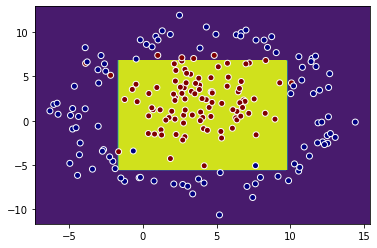

In [125]:
df = pd.read_csv('synthetic-4.csv', header = None)
vis_classifier(tree, df)

# Pokemon Dataset